# Group 31 Final Notebook

## Introduction

Our goal with this project was to determine the best neighborhood in Pittsburgh for being motivated to leave your house. As a group, we value "third spaces", places outside of the home and workplace that don't expect you to pay to be there, like many businesses would. These third spaces help build community, encourage people to try new things, and improve the physical and mental health of those who use them. We considered a number of things to help measure this, including public pools, museums, schools and more, but ultimately we decided on three that exemplified the benefits of third spaces. Those were:

* Green Spaces
    - This includes public parks, city maintained lawns and greenery. For this we used a data set of parks and other greenspaces maintained by the city of Pittsburgh.
* Public Facilities
    - This includes senior centers, community centers, and other public meeting places. For this we used a data set of facilities maintained by the city of Pittsburgh.
* Courts & Rinks
    - This includes basketball courts, tennis courts, and ice skating rinks. For this we used a data set of courts and rinks maintained by the city of Pittsburgh.
    
We feel as though this combination of metrics will help us determine which neighborhood is providing the most opportunities for its residents to leave their home and participate in the community around them.
    
# Metric 1: Parks

In [10]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

Here, I read in the data from parks.csv. This dataset contains the name, type of park, neighborhood, maintenance, zoning, images, and exact location. For our project I based my metric on the quantity of these various types of parks in a neighborhood.

In [11]:
parks = pd.read_csv("parks.csv")
num_parks = parks.groupby("neighborhood").size()
num_parks.sort_values(ascending=False)

neighborhood
East Liberty                 12
Central Business District    10
Beechview                     8
Point Breeze                  7
South Side Slopes             7
                             ..
Homewood West                 1
Oakwood                       1
Middle Hill                   1
North Oakland                 1
Windgap                       1
Length: 73, dtype: int64

Above, I created a decending table of the neighborhood and their park count with the highest quanitities shown higher on the table.

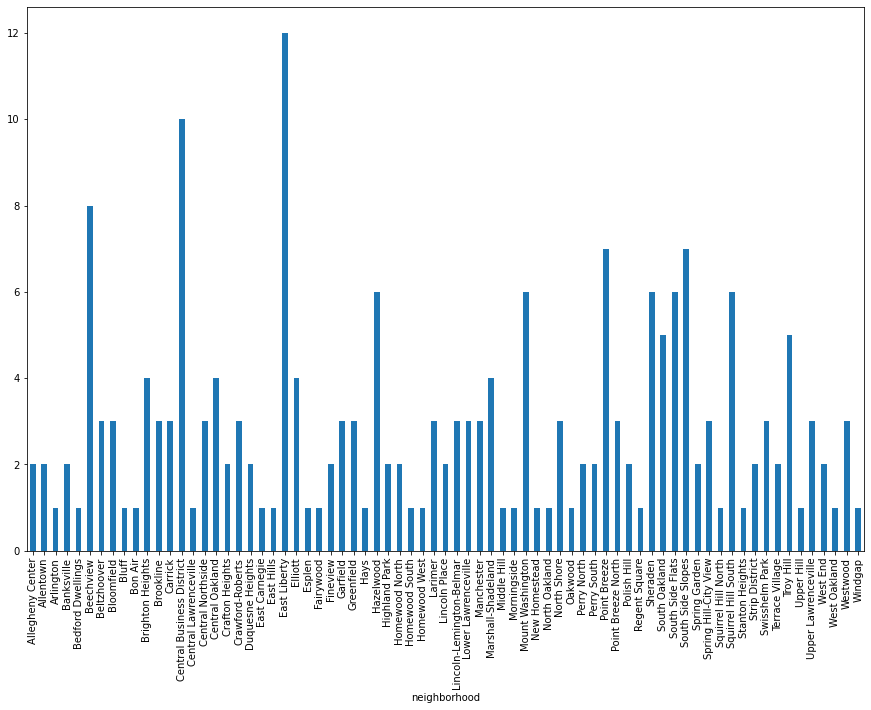

In [12]:
num_parks.plot.bar(figsize=(15,10))

This bar chart presents an informative overview of the distribution of parks and their quanitites in alphabetical order. This visual aid allows us to see the wide range between neighborhoods in Pittsburgh with the smallest being one park, and the largest being twelve.

,hood,parks,geometry
0,Central Oakland,4.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


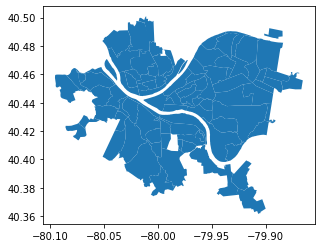

In [13]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()
parks_map = neighborhoods.merge(num_parks.rename("parks"), how='left', left_on='hood', right_on='neighborhood')
parks_map[['hood','parks','geometry']].head()

I merged the data that I extracted from the parks.csv and combined it with the file Neighborhoods_.shp to allow me to create a more comprehensive visual of the park distribution. The blue map above shows the Pittsburgh area before it has been merged with the park data.

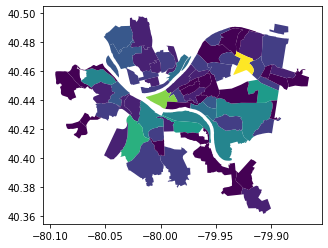

In [14]:
parks_map.plot(column='parks')

The graph above allows us to see the dispersion of parks in Pittsburgh, though it it not very readable yet. The color gradient is not intuitive, and there is no information provided telling me how to interpret this graph.

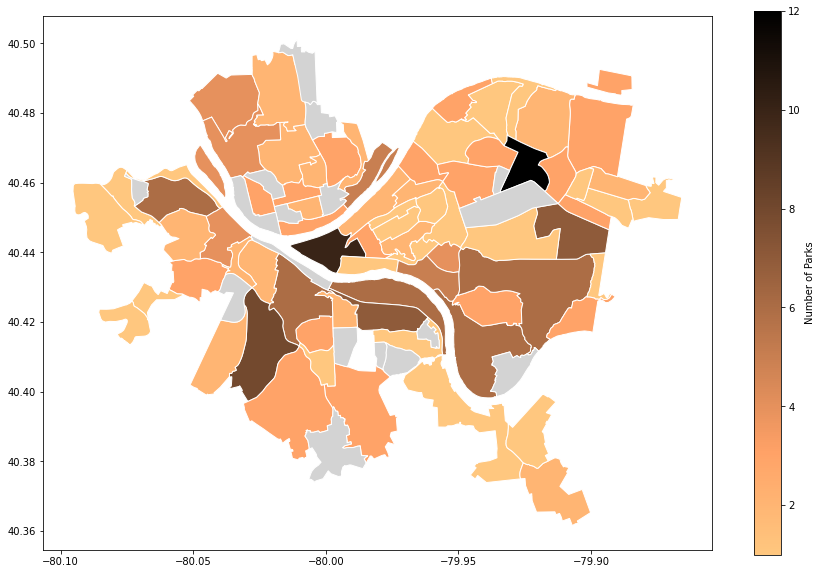

In [15]:
parks_map.plot(column='parks', 
               cmap='copper_r',           
               edgecolor="white",       
               legend=True,        
               legend_kwds={'label': "Number of Parks"}, 
               figsize=(15, 10),
               missing_kwds={"color": "lightgrey"} 
               )

To address this problem, I adjusted the color gradient, adjusted the size, and appropriately labelled the data to improve comprehension and clearly see where the density of parks in Pittsburgh is highest and lowest.

Based on my chosen metric, quantity of parks, I determined that the best neighborhood in Pittsburgh is East Liberty. Because East Libery has the highest number of parks, this neighborhood is best place to be motivated to leave your house.

# Metric 2: City Facilities

Analysis: I started by pulling the data into this file. Then, I organized the data by neighborhood. I then created a bar graph to get a clear visual of my data. I merged the data from the data.csv file with the neighborhoods file, in order to create the maps using geopandas to have more visuals to showcase what was the highest. My highest one was Highland Park and that it had the most facitlities for people to use. However, I think something that the data doesn't take into account is the population of each of the neighborhoods. If a neighborhood has a higher population, there may be more facilities. I think if the population was included I would've organized based on pupulation and by the neighborhood.

In [16]:
facilities = pd.read_csv("Facilities.csv")
num_facilities = facilities.groupby("neighborhood").size()
num_facilities.sort_values(ascending=False)

neighborhood
Highland Park           30
Squirrel Hill South     29
Perry North             20
Brookline               19
Strip District          15
                        ..
Bon Air                  1
California-Kirkbride     1
East Allegheny           1
Central Northside        1
Crafton Heights          1
Length: 75, dtype: int64

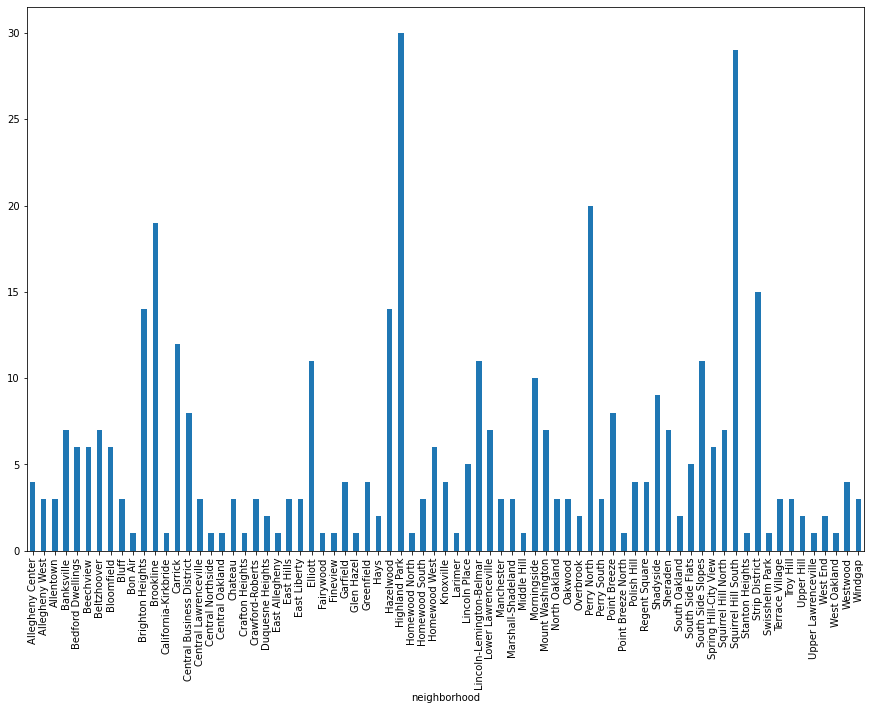

In [17]:
num_facilities.plot.bar(figsize=(15, 10))

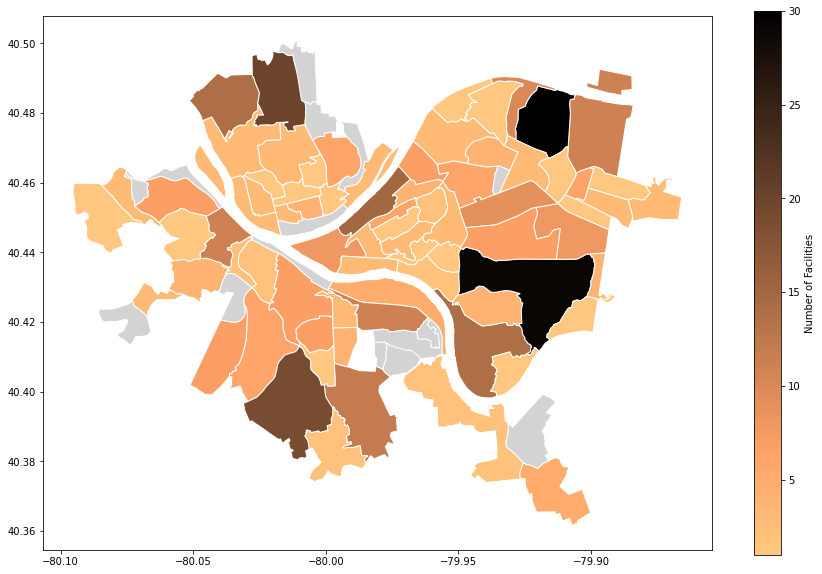

In [19]:
neighborhoods = geopandas.read_file("NeighborFiles/Neighborhoods_.shp") 
facilities_map = neighborhoods.merge(num_facilities.rename("facilities"), how='left', left_on='hood', right_on='neighborhood')
facilities_map.plot(column='facilities',
               cmap='copper_r',          
               edgecolor="white",      
               legend=True,    
               legend_kwds={'label': "Number of Facilities"}, 
               figsize=(15, 10), 
               missing_kwds={"color": "lightgrey"} 
               )

# Metric 3: Courts & Rinks

As part of our investigation into third spaces in Pittsburgh, I looked at public activity spaces like basketball courts and rinks. These spaces are vital for building community across generations, as well as introducing children to sports and providing hubs for those passionate about staying active to gather.

First, I imported all the data I will be using. 
After this, I grouped everything by the neighborhood and used the "size" function so I could have a count of courts attached to each neighborhood. To make it a little neater, I sorted it by highest to lowest count.

In [20]:
courts = pd.read_csv("Courts_Rinks.csv")
num_courts = courts.groupby("neighborhood").size()
num_courts.sort_values(ascending=False)

neighborhood
Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
                       ..
Perry South             1
Bon Air                 1
Upper Hill              1
Allentown               1
Middle Hill             1
Length: 63, dtype: int64

While this helps us understand what the counts are, it's a little hard to visualize, so here's the top 10 values in the form of a bar graph.

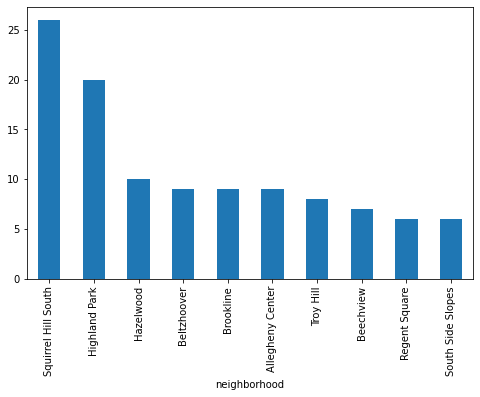

In [21]:
num_courts.sort_values(ascending=False).head(10).plot.bar(figsize=(8, 5))

From this graph, we can see that Squirrel Hill South and Highland Park have much higher counts than any other neighborhood, and it quickly decreases after that. While this shows us the top neighborhoods, it's difficult to see any trends throughout the city. So let's make a map!

Below I import the shape files for Pittsburgh neighborhoods, and merge it with the counts I made for the courts. Then, with a little geopandas magic, I made a heatmap of the neighborhoods that shows where the most courts are through a color gradient.

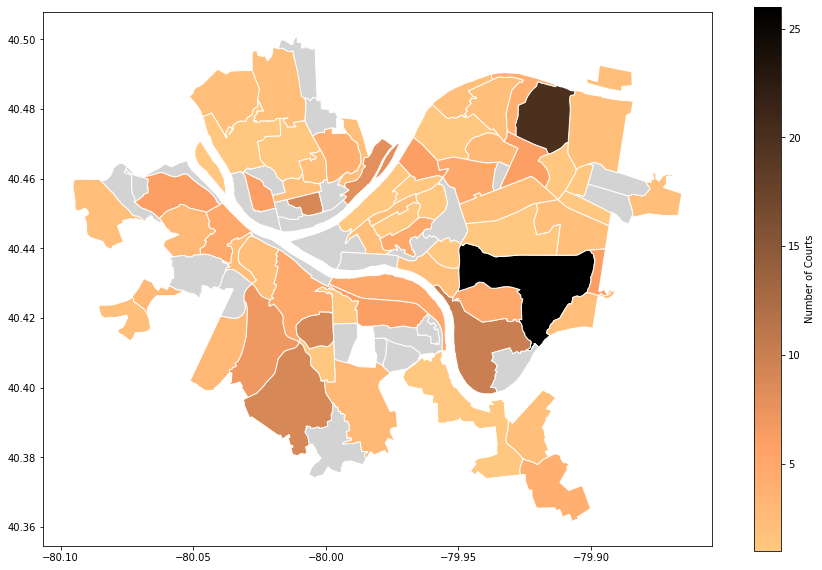

In [22]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
courts_map = neighborhoods.merge(num_courts.rename('courts'), how='left', left_on='hood', right_on='neighborhood')
courts_map.plot(column='courts', cmap='copper_r', edgecolor="white", legend=True,
legend_kwds={'label': "Number of Courts"},  figsize=(15, 10),  missing_kwds={"color": "lightgrey"} )

From this, we can see that in more urban areas, especially Downtown and North Shore, there are no courts at all, but numbers rise as neighborhoods become further away from these areas. This indicates that outdoor activity and community is not prioritized in the economic centers of the city.

Regardless, it is clear from the bar chart and the map that one neighborhood comes out on top.

Squirrel Hill South is the top neighborhood for Courts & Rinks!

# Metrics Combined

Because we all used a simple count method for our submetrics, we can combine our data to make one map that encompasses all of the metrics!

Below, we combined all of the data sets into one datafram, and then labeled the columns so we could create a new dataframe that had the full count from all 3 metrics.

In [43]:
data = [num_courts, num_facilities, num_parks]
all_data = pd.concat(data)
all_data.columns = ['neighborhood', 'count']
merged_metric = all_data.groupby("neighborhood").sum()
merged_metric.sort_values(ascending=False)

neighborhood
Squirrel Hill South     61
Highland Park           52
Brookline               31
Hazelwood               30
South Side Slopes       24
                        ..
Glen Hazel               1
Esplen                   1
East Allegheny           1
California-Kirkbride     1
Arlington                1
Length: 81, dtype: int64

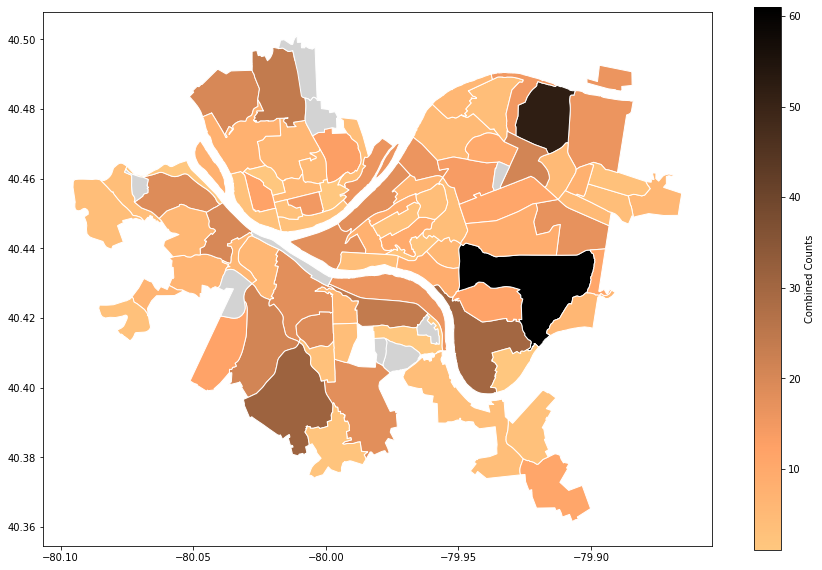

In [47]:
merge_map = neighborhoods.merge(merged_metric.rename('merged'), how='left', left_on='hood', right_on='neighborhood')
merge_map.plot(column='merged',
               cmap='copper_r',              
               edgecolor="white",      
               legend=True,             
               legend_kwds={'label': "Combined Counts"},
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} 
               )

Above is a map with all three metrics combined. By looking at the sorted list and this map, our analysis concludes that the best neighborhood in Pittsburgh, by a large margin, is:
## Squirrel Hill South!

# Conclusion/Reflections

**Cynthia's Reflection:** 
While our analysis did reveal a clear winner in Squirrel Hill South, I imagine there could be some bias in this answer. Squirrel Hill South is home to one of the most expansive parks in Pittsburgh, Schenley Park. With extensive greenspace, numerous courts and rinks, and community facilities, this region's count may be inflated. Additionally, while we focused on no cost "third spaces", we could have included low cost ones or other spaces that were not included in our data sets. The act of "leaving home" doesn't have to be restricted to community and no cost spaces, perhaps additional data sets about concert venues, museums, or other attractions would have benefitted this project. Additionally, Squirrel Hill South is not my personal favorite neighborhood. I much prefer Shadyside and East Liberty. These spaces have many small businesses and foster community through food, shopping, and other means. They also often have public events such as charity concerts and flea markets that attract people from all communities to participate.

**AnnaMarie's Reflection:**
Our final determination of the best neighborhood in Pittsburgh based on the data that we collected was Squirrel Hill South! This did differ from the top neighborhood, East Liberty, that my data measuring the quantity of parks and green spaces concluded to. My personal favorite neighborhood in Pittsburgh would probably be Shadyside as I worked for a family there over the summer. In the area, I found some cute coffee shops, books shops, movie theaters, and other various activities held there like community organized street festivals and events.

**Avani's Reflection:**
Looking at our data, our best neighborhood was Squirrel Hill South.  This was different from what my personal favorite was because mine is the Strip District.  I also predicted that the Strip District would be the best neighborhood because of its diverse activities it offers to people.  For my data in particular, the Strip District was the second highest for facilities.  The Strip District has several community friendly activities which is why I had predicted that to be the winner. 